In [1]:
import os
import warnings
import numpy as np
from pathlib import Path
import oem
import matplotlib.pyplot as plt
import torchvision

warnings.filterwarnings("ignore")

In [2]:
OEMDIR = "/home/bruno/riken_openearthmap/LULC-RIKEN/integrated"
TRAIN_LIST = "data/train.txt"
VAL_LIST = "data/val.txt"
IMG_SIZE = 256
N_CLASES = 9

In [3]:
img_paths = [f for f in Path(OEMDIR).rglob("*.tif") if "/images/" in str(f)]
train_fns = [str(f) for f in img_paths if f.name in np.loadtxt(TRAIN_LIST, dtype=str)]
val_fns = [str(f) for f in img_paths if f.name in np.loadtxt(VAL_LIST, dtype=str)]

print("Total samples      :", len(img_paths))
print("Training samples   :", len(train_fns))
print("Validation samples :", len(val_fns))

Total samples      : 5000
Training samples   : 3000
Validation samples : 500


In [4]:
train_augm = torchvision.transforms.Compose(
    [
        oem.transforms.RandomRotate(),
        oem.transforms.RandomCrop(IMG_SIZE),
        ],
        )

val_augm = torchvision.transforms.Compose(
    [
        oem.transforms.Resize(IMG_SIZE),
        ],
        )        

In [5]:
train_set = oem.dataset.OpenEarthMapDataset(
    train_fns,
    classes=np.arange(N_CLASES).tolist(),
    augm=train_augm,
)

train_set = oem.dataset.OpenEarthMapDataset(
    train_fns,
    classes=np.arange(N_CLASES).tolist(),
    augm=val_augm,
)

/home/bruno/riken_openearthmap/LULC-RIKEN/integrated/aachen/images/aachen_70.tif
/home/bruno/riken_openearthmap/LULC-RIKEN/integrated/aachen/images/aachen_70.tif
/home/bruno/riken_openearthmap/LULC-RIKEN/integrated/aachen/images/aachen_70.tif
/home/bruno/riken_openearthmap/LULC-RIKEN/integrated/aachen/images/aachen_70.tif
/home/bruno/riken_openearthmap/LULC-RIKEN/integrated/aachen/images/aachen_70.tif


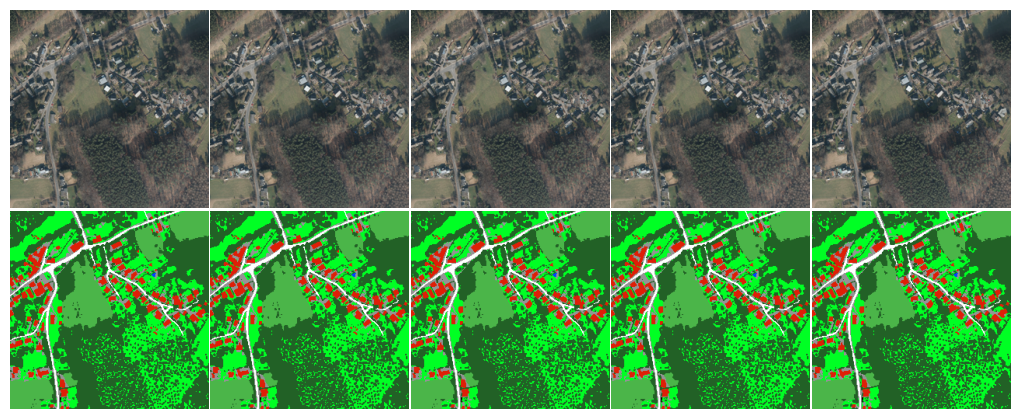

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(5*2, 2*2))
fig.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.01, wspace=0.01)
for i in range(5):
    img, msk, fn = train_set[1]

    img = np.moveaxis(img.numpy(), 0, -1)
    msk = oem.tools.make_rgb(np.argmax(msk.numpy(), axis=0))

    axs[0, i].imshow(img)
    axs[0, i].axis("off")
    axs[1, i].imshow(msk)
    axs[1, i].axis("off")

plt.show()